<h1 align="center"><font size="5">Test Sample Exploratory Data Analysis: Post Stats</font></h1>

> This notebook contains my attempt at performing and exploratory data analysis on the sample data that was provided to me as a test task. It's my first try at doing such analysis from scratch and with little to no instructions, which might partially explain any mess in the order of blocks or in my phrasing. I managed, however, get out of my initial overwhelm, especially while dealing with the CSV file that couldn't be opened properly until I fixed it, and can now present this EDA with some of my thoughts on the potential for further analysis of the problem.
> Please feel free to criticise any part of it, for I wish to improve my skills and am willing to learn from the experienced professionals.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul> <strong>
    <li>Importing the libraries and the data</li>
    <li>Dataframe's basic info</li>
    <li>Number of accounts and posts</li>
    <li>Time of posting</li>
    <li>Platform comparison</li>
    <li>Word analysis</li>
    <li>Text analysis</li>
    <li>Top posts</li>
    <li>Comparison of repeating and unique texts</li>
    <li>Conclusions</li>
</li>

### Importing the libraries and the data

The first step of data analysis is installing and importing the libraries that will be used in it.

In [6]:
!pip install pandas 
!pip install numpy 
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Then we read the data file.

In [9]:
data = pd.read_csv('test_sample.csv')

### Dataframe's basic info

Let's get the basic information on this dataframe:
* its size (rows, columns);

In [11]:
data.shape

(10000, 10)

* how it looks (its top 5 rows);

In [13]:
data.head()

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
0,Instagram,59141296785,C_00PPctR-o,2024-09-12 17:20:36.000000 +00:00,NaN,NaN,222.0,NaN,34.0,NaN
1,Instagram,60554087008,C_00W8KttVv,2024-09-12 17:21:27.000000 +00:00,C’è un gruppo sulla parola di Dio sulla mia ho...,NaN,391.0,NaN,37.0,NaN
2,Instagram,62605500679,C_026U_t3We,2024-09-12 17:43:38.000000 +00:00,𝐒𝐮𝐥 𝐦𝐢𝐨 𝐩𝐫𝐨𝐟𝐢𝐥𝐨 𝐜‘𝐞̀ 𝐮𝐧 𝐠𝐫𝐮𝐩𝐩𝐨 𝐝𝐢 𝐬𝐭𝐮𝐝𝐢𝐨 𝐬𝐮𝐥𝐥𝐚...,NaN,9.0,NaN,3.0,NaN
3,Instagram,58741537308,C_05B3hCYQn,2024-09-12 18:02:08.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,78.0,NaN,15.0,NaN
4,Instagram,58741537308,C_0BfOLiqRS,2024-09-12 09:57:22.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,129.0,NaN,16.0,NaN


* how many non-null entries and what are the types of data in each column;

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10000 non-null  object 
 1   account_id       10000 non-null  object 
 2   id               10000 non-null  object 
 3   created_time     10000 non-null  object 
 4   text_original    7613 non-null   object 
 5   text_additional  3 non-null      object 
 6   likes_count      9998 non-null   float64
 7   shares_count     5000 non-null   float64
 8   comments_count   9955 non-null   float64
 9   views_count      5621 non-null   float64
dtypes: float64(4), object(6)
memory usage: 781.4+ KB


* general statistical info about columns with numeric data (float64).

In [17]:
data.describe()

,likes_count,shares_count,comments_count,views_count
count,9998.000000,5000.000000,9955.000000,5.621000e+03
mean,1416.641928,79.232000,299.793872,1.797353e+04
std,5981.971791,979.564848,1257.022415,1.012492e+05
min,0.000000,0.000000,0.000000,3.000000e+00
25%,116.250000,3.000000,28.000000,1.539000e+03
50%,356.000000,9.000000,93.000000,3.704000e+03
75%,895.750000,43.000000,261.000000,8.535000e+03
max,188611.000000,47500.000000,80415.000000,3.500000e+06


### Number of accounts and posts

To understand whether there are any repetitions, we count the unique accounts and posts. We can see that out of 10000 rows all the posts are unique, but there are just 101 accounts that made those posts. 
Thus, we count how many posts there are from each account. The smallest number of posts by one account in our dataframe is 1, the biggest is 657.

In [20]:
print(data['account_id'].nunique(), data['id'].nunique())

101 10000


In [21]:
account_posts = data.groupby(['platform', 'account_id']).agg({'id':'count'}).reset_index()
account_posts.sort_values("id", axis=0, ascending=False, inplace=True)
account_posts

,platform,account_id,id
40,Instagram,58769017625,657
47,Instagram,62605500679,477
93,YouTube,UCnCTdYt9SicG9-yrlf-0GbQ,409
60,TikTok,7308760731372291104,386
74,YouTube,UCEaVXzCYOxl77NFD8U97q5A,365
...,...,...,...
10,Facebook,100089465236396,1
35,Facebook,61552271822243,1
79,YouTube,UCO6AIGEiIB6bfMN84mSVEEQ,1
85,YouTube,UCaUPqufKXhrf1WH-ab413Rg,1


### Time of posting

To see what period is covered in our dataframe, we check when the earliest and latest posts were created. 

In [24]:
data['created_time'] = pd.to_datetime(data['created_time'])
from_ = data['created_time'].min()
to_ = data['created_time'].max()
print("We have the posts information from", from_, 'to', to_)

We have the posts information from 2024-01-01 00:00:05+00:00 to 2024-12-05 14:01:01+00:00


We make a line plot to see how many posts were created in total on each day of the period covered. It's clear that March was by far the most "productive", followed by a drastic fall of the number of posts created in April, and then by two distinctive waves of gradual rising and rapid falling of posts number in July and October.

Text(0.5, 1.0, 'Distribution of Posts by Date')

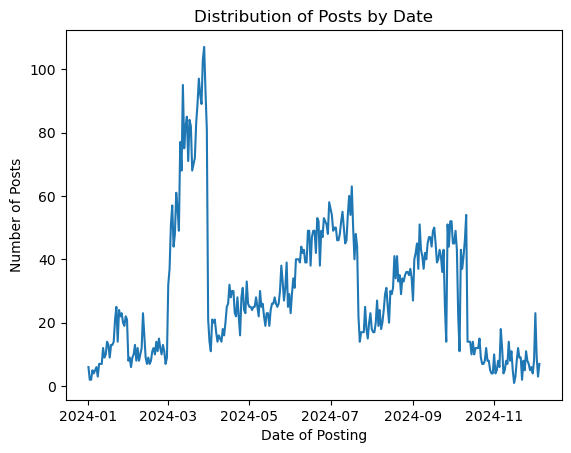

In [26]:
data['created_time'].dt.date.value_counts().plot(kind='line')
plt.xlabel('Date of Posting')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts by Date')

To see the most and least popular time of creating posts, we make a bar plot. It shows that the most posts were created at 5, 9, 17, and 15 o'clock, while the night hours (21-2) and the meal times (7-8, 12-13, 19-20) are not so active in terms of posting, just as the 3 a.m., when some creators seem to wake up. 

Text(0.5, 1.0, 'Distribution of Posts by Hour')

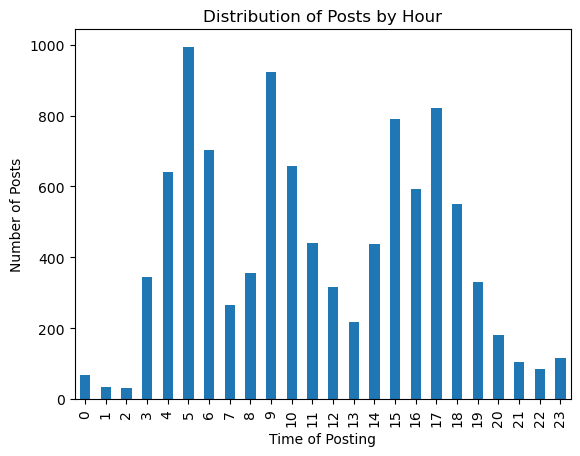

In [28]:
data['created_time'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Time of Posting')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts by Hour')

We can also sort our data in chronological order.

In [30]:
data = data.sort_values(by = "created_time")
data

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
2500,TikTok,7317060523728045062,7318912899127217414,2024-01-01 00:00:05+00:00,#PoderDaOração\n #Fé\n #Acreditar\n #ImpactoPo...,NaN,799.0,48.0,320.0,6979.0
5015,Facebook,61550964482774,122144047736032149,2024-01-01 00:21:40+00:00,NaN,NaN,45.0,7.0,47.0,NaN
2501,TikTok,7317060523728045062,7319114568901332229,2024-01-01 13:02:41+00:00,#nossasenhoraaparecida #nossamãe #rainha #fé #...,NaN,409.0,72.0,20.0,4634.0
5014,Facebook,61550964482774,122144150528032149,2024-01-01 13:55:16+00:00,NaN,NaN,68.0,4.0,194.0,NaN
2502,TikTok,7317060523728045062,7319194312892353798,2024-01-01 18:12:08+00:00,#porta #anjo #boasnoticias #agosto,NaN,163.0,18.0,29.0,1718.0
...,...,...,...,...,...,...,...,...,...,...
7725,YouTube,UCaJeT6faItNN4lc4vHRjDHw,tX3fOBu4Hjo,2024-12-05 07:07:19+00:00,#Prière #Prièrecatholique#dieu #catholique #fr...,NaN,2.0,NaN,1.0,17.0
7523,YouTube,UC3pF1tXsYI8Xme1oxciBXfw,6y5iT5xYFoo,2024-12-05 07:39:52+00:00,"❤️Господи Ісусе Христе, захисти наших захисник...",NaN,85.0,NaN,2.0,291.0
7768,YouTube,UC7ggIEhMpmM8WiZ1SzCswrw,zFzgbboi998,2024-12-05 10:40:11+00:00,"Se passi senza ringraziare Maria, domani potre...",NaN,205.0,NaN,29.0,431.0
7767,YouTube,UC7ggIEhMpmM8WiZ1SzCswrw,nj0hoXabfzo,2024-12-05 12:01:03+00:00,Santa Rita verrà a trovarti stasera Porterà v...,NaN,66.0,NaN,12.0,77.0


### Platform comparison

First, we compare the four platforms from our dataframe by their median numbers of likes, shares, comments and views. Instagram and YouTube don't allow reposting, thus they don't show the shares number of the posts, and Instagram also doesn't show the number of views of the posts (unless the post is a reel). Median shows that in general, TikTok posts get more views and likes, while Facebook posts have more shares and comments.

In [33]:
print(data.groupby('platform')[['likes_count', 'shares_count', 'comments_count', 'views_count']].median())

           likes_count  shares_count  comments_count  views_count
platform                                                         
Facebook         135.5          22.0           202.5       1225.0
Instagram        411.5           NaN            70.0          NaN
TikTok           663.0           6.0           121.0       4793.5
YouTube          353.5           NaN            44.0       3048.5


When it comes to comparison by likes, we can see in this box plot that the boxes are not so different in between the four platforms, but from the outliers it's clear that YouTube posts from our dataframe have 4 out of 7 highest numbers of likes across all platforms. Instagram outliers are not so widespread, and Facebook posts get in general the least amount of likes, apart from 1 post that got in the top-7 of all. 

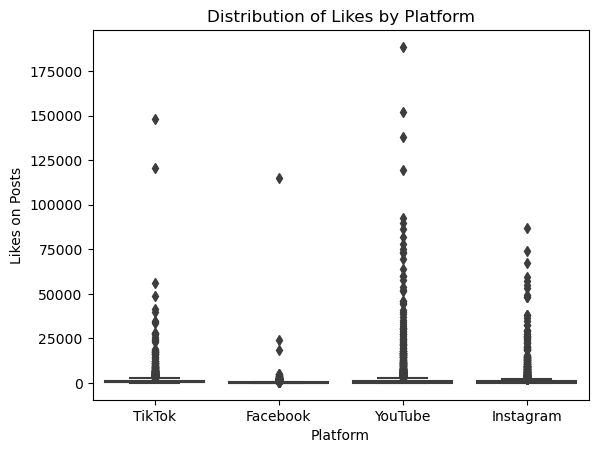

In [35]:
fig, ax = plt.subplots()
sns.boxplot(data=data, x='platform', y='likes_count', ax=ax)
ax.set_xlabel("Platform")
ax.set_ylabel("Likes on Posts")
ax.set_title("Distribution of Likes by Platform")
plt.show()

### Word analysis

A lot of posts use hashtags for the promotion, so we can check what the most used hashtags are and how many times they come up in our dataframe. We lower the case to be able to include all forms of the same hashtags in our counting.

In [38]:
from collections import Counter
hashtags = Counter([tag.lower() for text in data['text_original'].dropna() for tag in text.split() if tag.startswith('#')])
print(hashtags.most_common(10))

[('#preghiera', 904), ('#jezus', 854), ('#gesù', 853), ('#молитва', 659), ('#modlitwa', 630), ('#бог', 610), ('#bóg', 586), ('#wiara', 559), ('#господь', 480), ('#maria', 427)]


Wordcloud will help us visualise the most popular hashtags.

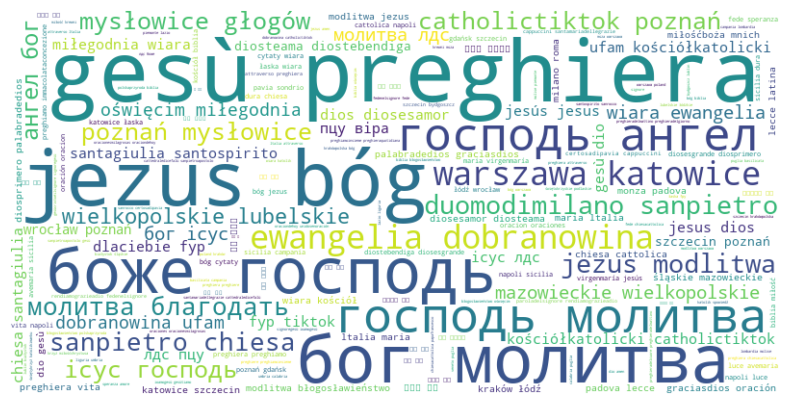

In [40]:
from wordcloud import WordCloud
import re

hashtags = ' '.join(re.findall(r'#\w+', ' '.join(data['text_original'].astype(str)).lower()))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

And then compare them to the most popular words in the posts. This allows us to see that the posts covered in our dataframe primarily have some other links in them and calls for action (to like, write something or click the links).

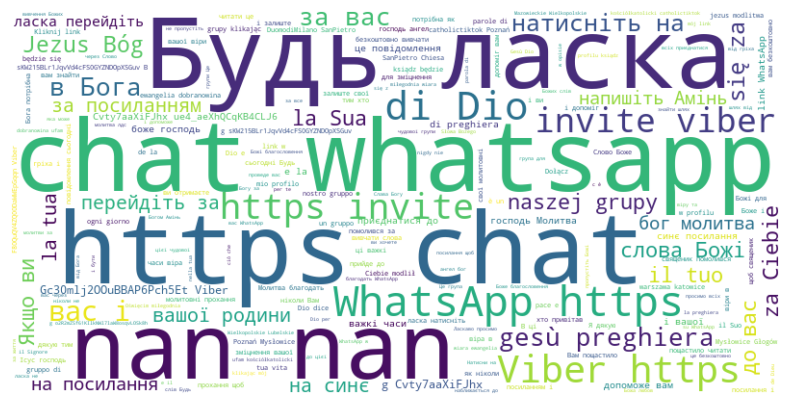

In [42]:
from wordcloud import WordCloud

text_data = ' '.join(data['text_original'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Text analysis

To check whether the texts of the posts repeat, we count the number of unique texts. The result (5689) is smaller than the number of non-null entries in that column (7613), which means that some posts indeed have  the same texts. We then count the repeating texts and how many times each of them repeats, and get 546 texts that are used in up to 
56 posts. 

In [45]:
text_counts = data['text_original'].value_counts()
print(text_counts)

text_original
#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsignore\n#rendiamograzieadio\n#fedenelsignore\n#fede\n#chiesacattolica                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                56
❤️Я дякую тим, хто привітав.❤️#боже #господь #ангел #бог #молитва #лдс 👉WhatsApp:https://chat.whatsapp.com/Gc30mlj2OOuBBAP6Pch5Et  \n👉Viber:https://invite.viber.com/?g=Cvty7aaXiFJhx-ue4_aeXhQCqKB4CLJ6 \n👆Натисни на синє посилання і попроси Бога зняти твій стрес і біль, дати тобі мир і щастя.👆

In [46]:
repeated_texts = text_counts[text_counts > 1]
print(repeated_texts)

text_original
#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsignore\n#rendiamograzieadio\n#fedenelsignore\n#fede\n#chiesacattolica                                                                                                                                                                                                                                                                                                        56
❤️Я дякую тим, хто привітав.❤️#боже #господь #ангел #бог #молитва #лдс 👉WhatsApp:https://chat.whatsapp.com/Gc30mlj2OOuBBAP6Pch5Et  \n👉Viber:https://invite.viber.com/?g=Cvty7aaXiFJhx-ue4_aeXhQCqKB4CLJ6 \n👆Натисни на синє посилання і попроси Бога зняти твій стрес і біль, дати тобі мир і щастя.👆                                                                                                                     53
#signoregesucristo\n#signoregesucristo\n#chiesadigesucristodeisantidegliultimigiorni\n#signoregesucristo\n#gesùcrocifisso\n#gesùstorico\n#ilvangelosecondogesùcr

Here we can check and see that the total number of posts that have repeating texts is 1924.

In [48]:
total_texts = len(data['text_original'])
unique_texts = data['text_original'].nunique()
empty_texts = data['text_original'].isnull().sum()
repeated_count = total_texts - unique_texts - empty_texts

print(f"Total texts: {total_texts}")
print(f"Unique texts: {unique_texts}")
print(f"Empty texts: {empty_texts}")
print(f"Repeated texts: {repeated_count}")

Total texts: 10000
Unique texts: 5689
Empty texts: 2387
Repeated texts: 1924


We can make a bar plot that shows the quantity of posts that have the same number of repetitions. It shows that over 250 times the same 2 different posts have the same text, nearly 100 times the same text repeats in 3 different posts, and so on. The tiniest bars indicate only one case of repetition for 56, 53, 50, and several other numbers of posts, and slightly higher bars show 2-3 cases of repetition in 34, 22, 19 and a bunch of other numbers of posts. Which is curious, but might as well not be indicative of anything, just a coincidence. What is clear, though, is that majority of repetitive texts are met in 2 posts only, and the repetitions in over 5 posts happen relatively seldom. 

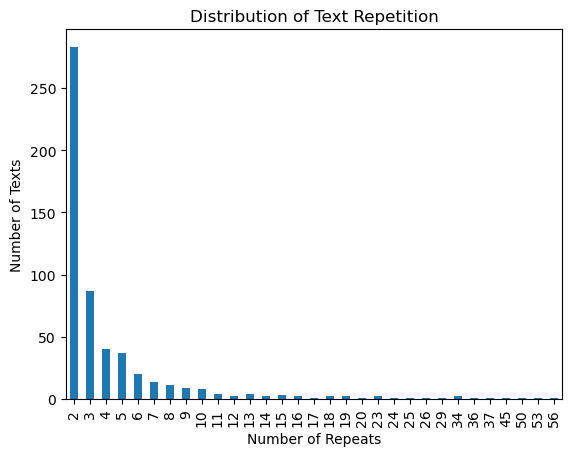

In [50]:
import matplotlib.pyplot as plt

repeated_counts = text_counts[text_counts > 1]

repetition_distribution = repeated_counts.value_counts().sort_index()
repetition_distribution.plot(kind='bar')
plt.xlabel('Number of Repeats')
plt.ylabel('Number of Texts')
plt.title('Distribution of Text Repetition')
plt.show()

Here we can check the distribution of the number of repeated texts across different platforms.

In [52]:
repeated_platforms = data[data['text_original'].isin(repeated_texts.index)].groupby('platform').size()
print(repeated_platforms)

platform
Facebook     411
Instagram    901
TikTok       673
YouTube      485
dtype: int64


### Top posts

To understand what posts were the most successful across all platforms, we make top lists by the overall highest numbers of likes, shares, comments and views.

In [55]:
top_likes = data.nlargest(10, 'likes_count')[['id', 'likes_count', 'platform', 'text_original']]
top_shares = data.nlargest(10, 'shares_count')[['id', 'shares_count', 'platform', 'text_original']]
top_comments = data.nlargest(10, 'comments_count')[['id', 'comments_count', 'platform', 'text_original']]
top_views = data.nlargest(10, 'views_count')[['id', 'views_count', 'platform', 'text_original']]

print("Top 10 posts by likes:\n", top_likes)
print("Top 10 posts by shares:\n", top_shares)
print("Top 10 posts by comments:\n", top_comments)
print("Top 10 posts by views:\n", top_views)

Top 10 posts by likes:
                        id  likes_count   platform  \
8876          O8paDuixTvg     188611.0    YouTube   
9093          UJkSg9wmld0     151997.0    YouTube   
2551  7324446602066775302     148000.0     TikTok   
9134          uJB296btYLc     137840.0    YouTube   
3118  7355924016575581473     120400.0     TikTok   
8128          xi2Cfl-t2pQ     119650.0    YouTube   
7163      328903293543883     115106.0   Facebook   
9177          yICUB8BnXrY      92729.0    YouTube   
8861          eEhxx-qSrK8      89730.0    YouTube   
739           C8-OBMRiHRp      87189.0  Instagram   

                                          text_original  
8876  У жорстокій вІЙНІ Я втратив обидві ноги. 🙏🌹💖Ла...  
9093  Будь ласка, знайдіть 60 секунд, щоб подякувати...  
2551  #maria #nossasenhora #nossasenhoraaparecida #m...  
9134  Якщо не проти, привітайте мене, будь ласка. #б...  
3118  #italia #Milano #Roma #Napoli #Toscana #Modonn...  
8128  ❤️Я дякую тим, хто привітав.Я захищаю 

And then we can see the posts that have high counts in all four categories combined (if applicable to the platform).

In [57]:
top_metrics = data[['id', 'platform', 'text_original', 'likes_count', 'shares_count', 'comments_count', 'views_count']]
top_metrics_sorted = top_metrics.sort_values(by=['likes_count', 'shares_count', 'comments_count', 'views_count'], ascending=False)

print(top_metrics_sorted.head(10))

                       id   platform  \
8876          O8paDuixTvg    YouTube   
9093          UJkSg9wmld0    YouTube   
2551  7324446602066775302     TikTok   
9134          uJB296btYLc    YouTube   
3118  7355924016575581473     TikTok   
8128          xi2Cfl-t2pQ    YouTube   
7163      328903293543883   Facebook   
9177          yICUB8BnXrY    YouTube   
8861          eEhxx-qSrK8    YouTube   
739           C8-OBMRiHRp  Instagram   

                                          text_original  likes_count  \
8876  У жорстокій вІЙНІ Я втратив обидві ноги. 🙏🌹💖Ла...     188611.0   
9093  Будь ласка, знайдіть 60 секунд, щоб подякувати...     151997.0   
2551  #maria #nossasenhora #nossasenhoraaparecida #m...     148000.0   
9134  Якщо не проти, привітайте мене, будь ласка. #б...     137840.0   
3118  #italia #Milano #Roma #Napoli #Toscana #Modonn...     120400.0   
8128  ❤️Я дякую тим, хто привітав.Я захищаю тебе, бу...     119650.0   
7163  #santamisadehoy #maria #virgenmaría #jesús #Je...

We can visualise the response that we received to our previous request by making 4 bar plots for the top 10 posts across all categories and platforms. It can help us understand the difference in gaining popularity by the four countable metrics (likes, shares, comments, and views) on each of the platforms. It confirms our previous data on the  higher amount of comments on Facebook, even though that post has significantly less views than the other posts in the top-10. YouTube, on the other hand, has a disproportionately small number of comments per view, but a decent number of likes per view.

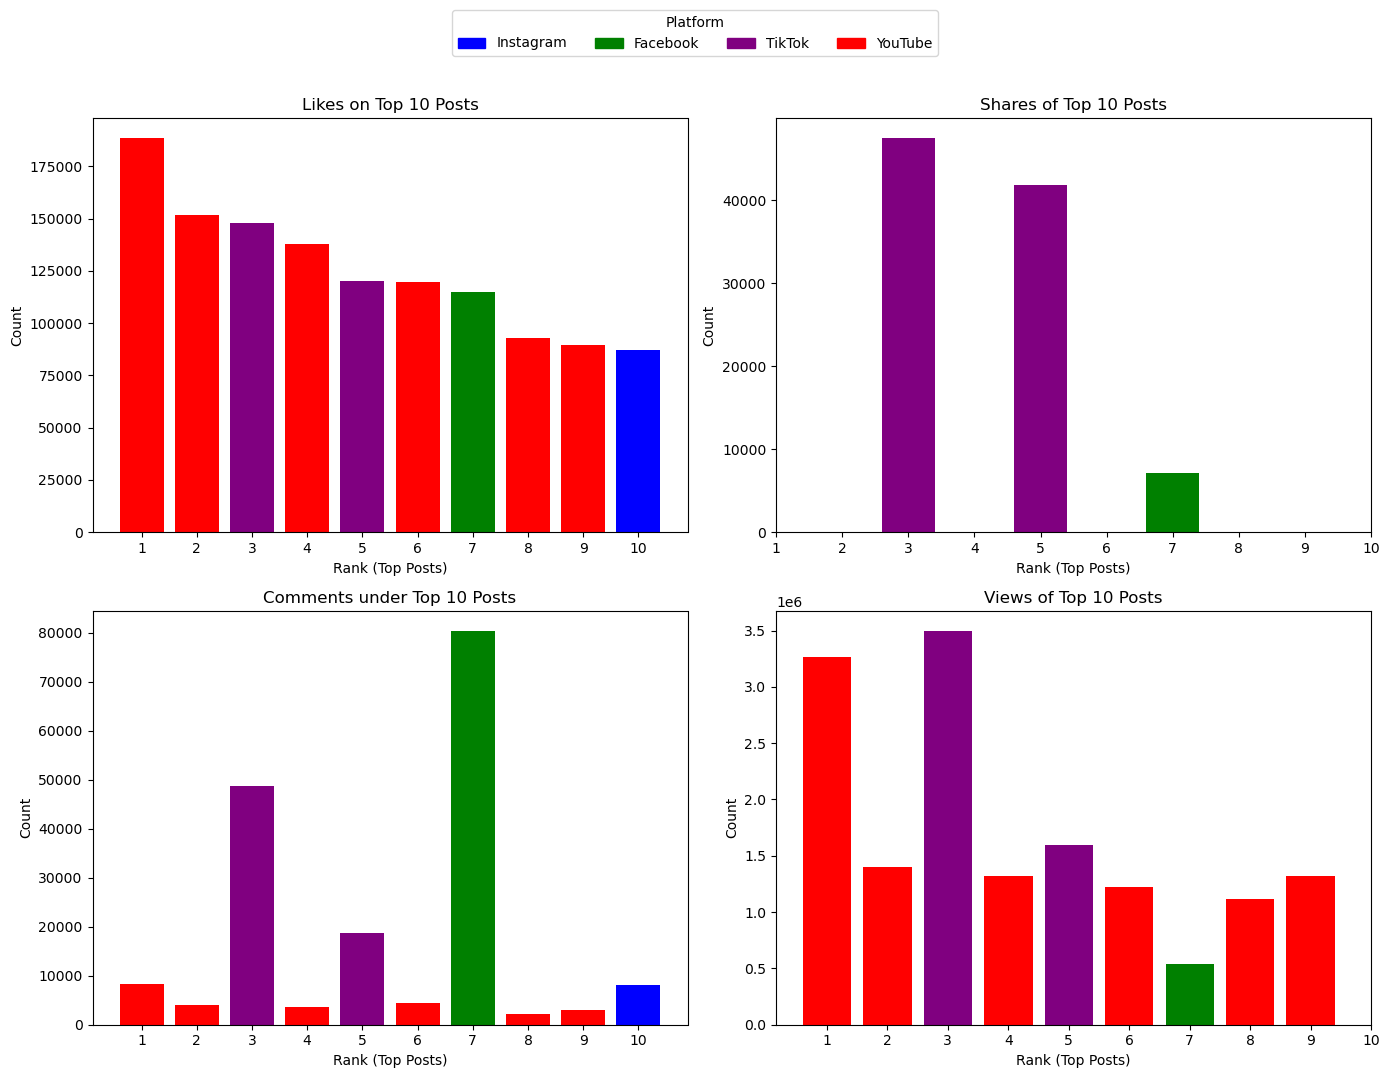

In [59]:
import matplotlib.pyplot as plt

top_10_posts = top_metrics_sorted.head(10).reset_index(drop=True)
top_10_posts['rank'] = range(1, 11)

platform_colors = {
    'Instagram': 'blue',
    'Facebook': 'green',
    'TikTok': 'purple',
    'YouTube': 'red'
}
colors = top_10_posts['platform'].map(platform_colors)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['likes_count', 'shares_count', 'comments_count', 'views_count']
titles = ['Likes on Top 10 Posts', 'Shares of Top 10 Posts', 
          'Comments under Top 10 Posts', 'Views of Top 10 Posts']

axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(top_10_posts['rank'], top_10_posts[metric], color=colors)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Rank (Top Posts)')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(top_10_posts['rank'])
    axes[i].tick_params(axis='x', rotation=0) 

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in platform_colors.values()]
labels = platform_colors.keys()
fig.legend(handles, labels, loc='lower center', title='Platform', bbox_to_anchor=(0.5, 1.02), ncol=4)

plt.tight_layout()
plt.show()

### Comparison of repeating and unique texts

Finally, we can check if there's any correlation between repetitively using the same text for posts and better post performance, measured by likes, shares, comments and views.

In [62]:
data['text_repetition_count'] = data.groupby('text_original')['text_original'].transform('count')

repeating_texts = data[data['text_repetition_count'] > 1]
unique_texts = data[data['text_repetition_count'] == 1]

metrics = ['likes_count', 'shares_count', 'comments_count', 'views_count']
average_metrics_repeating = repeating_texts[metrics].mean()
average_metrics_unique = unique_texts[metrics].mean()

print("Average Metrics for Repeating Texts:")
print(average_metrics_repeating)

print("\nAverage Metrics for Unique Texts:")
print(average_metrics_unique)

Average Metrics for Repeating Texts:
likes_count        1775.214170
shares_count        115.037823
comments_count      360.982026
views_count       21612.924306
dtype: float64

Average Metrics for Unique Texts:
likes_count        1596.336445
shares_count         77.673893
comments_count      257.138564
views_count       17898.838338
dtype: float64


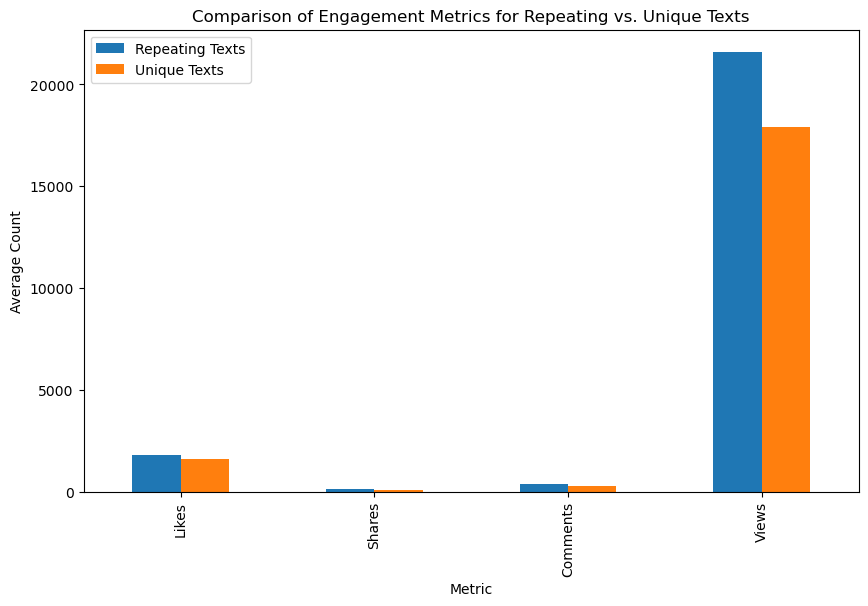


Correlation between Repetition Count and Metrics:
                       text_repetition_count  likes_count  shares_count  \
text_repetition_count               1.000000     0.038409     -0.006866   
likes_count                         0.038409     1.000000      0.759403   
shares_count                       -0.006866     0.759403      1.000000   
comments_count                      0.001063     0.538128      0.540519   
views_count                         0.047958     0.916820      0.889638   

                       comments_count  views_count  
text_repetition_count        0.001063     0.047958  
likes_count                  0.538128     0.916820  
shares_count                 0.540519     0.889638  
comments_count               1.000000     0.497396  
views_count                  0.497396     1.000000  


In [63]:
average_metrics = pd.DataFrame({
    'Metric': metrics,
    'Repeating Texts': average_metrics_repeating.values,
    'Unique Texts': average_metrics_unique.values
})

metric_labels = {
    'likes_count': 'Likes',
    'shares_count': 'Shares',
    'comments_count': 'Comments',
    'views_count': 'Views'
}
average_metrics['Metric'] = average_metrics['Metric'].replace(metric_labels)

average_metrics.plot(x='Metric', kind='bar', figsize=(10, 6), title='Comparison of Engagement Metrics for Repeating vs. Unique Texts')
plt.ylabel('Average Count')
plt.show()

correlation = data[['text_repetition_count', 'likes_count', 'shares_count', 'comments_count', 'views_count']].corr()
print("\nCorrelation between Repetition Count and Metrics:")
print(correlation)

As we can see, the mean, or average, numbers of all four parameters across all platforms are higher for repeating texts. To understand the difference better, here's the visualization of this difference in percents (by how many percents the posts with repeating texts perform better than the unique posts). The difference is most noticeable in shares and comments counts, thus repeating texts in different posts seem to have a big impact on post interactions.

Percentage Difference Between Repeating and Unique Texts:
likes_count       11.21
shares_count      48.10
comments_count    40.38
views_count       20.75
dtype: float64


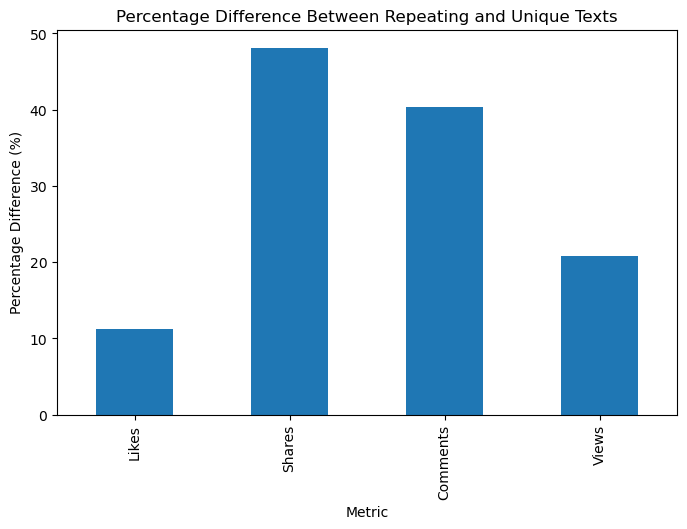

In [65]:
percent_difference = (average_metrics_repeating - average_metrics_unique) / average_metrics_unique * 100

percent_difference = percent_difference.round(2)
print("Percentage Difference Between Repeating and Unique Texts:")
print(percent_difference)

percent_difference.index = percent_difference.index.map(metric_labels)

percent_difference.plot(kind='bar', figsize=(8, 5), title='Percentage Difference Between Repeating and Unique Texts')
plt.ylabel('Percentage Difference (%)')
plt.xlabel('Metric')
plt.show()

## Conclusions

After conducting this rather surface-level exploratory data analysis on the provided dataframe, we managed to get some initial insights.

* The 10000 posts covered in this dataframe were created by just 101 accounts. The amount of posts made by one account vary from 1 to 657.
* The median number of shares and comments is the highest on Facebook, despite the smallest median amount of likes and views (not taking into account Instagram, where the views number is not included), which is the highest on TikTok.
* Many hashtags are used and repeated in these posts, especially if counting non-case-sensitively.
* The most used words in hashtags are mostly related to religious, and some - to locations, while the most used words overall are links or calls for actions, which work quite well, according to the number of interactions under these posts.
* 1924 of these posts use 546 texts that repeat 2-56 times. The biggest number of posts that use repeating texts belongs to Instagram, with 901.
* In top-10 posts by different metrics platforms show inconsistent leadership, but if we combined all 4 metrics together, the overall top-10 contains 6 posts from YouTube, 2 posts from TikTok, and 1 each from Facebook and Instagram.
* Visualization of top-10 posts metrics demonstrate the very high number of comments per view on Facebook and the smallest numbers of comments per view on YouTube. TikTok proved to be the most consistent in terms of interactiveness.
* Comparison of posts with repeating and unique texts shows that repetition leads to higher metrics, the difference being most noticeable in shares and comments (respectively 48.1% and 40.38% more than unique posts).

There is still a wide range of possible analyses of this data. I, for once, think of comparison the metrics of different accounts; finding the links between accounts on different platforms that may suggest that they are owned by the same person or organisation; checking if these calls for actions actually work better than posts that don't have them at least in the text description (they may still be in the pictures or videos of those posts); comparing posts in different languages to see if some languages work better than others in terms of manipulating its audience with religious or other interaction baits; looking into what happened in March that lead to creation of huge amounts of posts from this dataframe, and why the numbers dropped so much in April (this may require additional research); checking if there is a clear correlation between posting time and the interaction metrics; and, also with additional research, looking into possible connections in between of these accounts and between them and other harmful accounts/organisations, for it's quite obvious that intentions of these accounts and their posts are not to spread love and kindness, but to gain viewers and followers by using fakes and manipulations on the gullible.

### Author:
## Kateryna Rumiantseva